In [44]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats.stats import pearsonr   
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data_right = pd.read_excel('full_data_right.xlsx')
data_left = pd.read_excel('full_data_left.xlsx')
data_er = pd.read_excel('full_data_er.xlsx')

In [3]:
import unicodedata

def unicode_to_string(word):
    if pd.isnull(word):
        return 
    else:
        return unicodedata.normalize('NFKD', word).encode('ascii','ignore')
    
def data_to_string(data):
    new_data = data.copy()
    
    col_title_unicode = new_data.columns.values.tolist()
    col_title = map(unicode_to_string,col_title_unicode)
    new_data.columns = col_title
    
    for col in new_data.columns:
        not_nan_index = [not ind for ind in new_data[col].isnull()]
        not_nan_value = new_data[col][not_nan_index]
        if type(not_nan_value.iloc[0]) == unicode: #check the first not-NaN value
            new_data[col] = map(unicode_to_string,new_data[col])
            
    return new_data

In [4]:
def float_to_int(data):
    new_data = data.copy()    
    for col in new_data.columns:
        if '%' in col: 
            # Here we add this condition because the variable %voix needs to be in float format 
            # Need to think more about this in case we have more float-fotmat data 
            continue
        else: 
            not_nan_index = [not ind for ind in new_data[col].isnull()]
            not_nan_value = new_data[col][not_nan_index]
            if type(not_nan_value.iloc[0]) == np.float64: #check the first not-NaN value
                new_data[col] = new_data[col].round()
    return new_data

In [5]:
data_right = data_to_string(data_right)
data_right = float_to_int(data_right)

data_left = data_to_string(data_left)
data_left = float_to_int(data_left)

data_er = data_to_string(data_er)
data_er = float_to_int(data_er)

### We will create a new data frame containing only the variable needed. We drop all the others variables. 

In [6]:
def create_final_data(data):
    new_data = data.copy()
    title = data.columns.tolist()
    dropping_index = []
    keeping_variable = ['Code Insee','% Voix/Ins','% Voix/Exp','% immigrant','% C12_POP15P_CS1','% C12_POP15P_CS2','% C12_POP15P_CS3',
                        '% C12_POP15P_CS4','% C12_POP15P_CS5', '% C12_POP15P_CS6','% C12_POP15P_CS7', '% C12_POP15P_CS8',
                        'SNHM12','Total ']
    for index, variable in enumerate(title): 
        if variable not in keeping_variable:
            dropping_index.append(index)
    new_data = new_data.drop(new_data.columns[dropping_index], axis = 1)
    return new_data

In [7]:
selected_data_right = create_final_data(data_right)
selected_data_left = create_final_data(data_left)
selected_data_er = create_final_data(data_er)

In [8]:
def create_cor_table(data):
    variable_list = data.columns.tolist()
    columns_list = ['D/Agriculteurs','D/Artisans','D/Cadres','D/Prof_Intermediaire','D/Employes', 
               'D/Ouvrier', 'D/Retraite', 'D/Autre','D/Immigrants','D/salaire'] # this list must be in the order of
                                                                                # the data's column list
    cor_right_party = pd.DataFrame(columns = columns_list)
    counter = 3 # because the first 3 variables in the variable list are not important 
    for col in columns_list:
        extract_data = data[['% Voix/Exp', variable_list[counter]]]
        extract_data = extract_data.dropna()
        cor = pearsonr(extract_data[extract_data.columns[0]], extract_data[extract_data.columns[1]])[0] * 100
        cor_right_party[col] = [cor]
        counter += 1 
    return cor_right_party

In [9]:
correlation_right_party = create_cor_table(selected_data_right)
correlation_left_party = create_cor_table(selected_data_left)
correlation_er_party = create_cor_table(selected_data_er)
correlation_table = pd.concat([correlation_right_party, correlation_left_party, correlation_er_party])

In [10]:
correlation_table.index = ['Right', 'Left', 'Extreme Right']

In [11]:
correlation_table.T

,Right,Left,Extreme Right
D/Agriculteurs,17.898836,-3.876219,-10.988869
D/Artisans,-1.428497,9.725289,-8.881199
D/Cadres,6.420419,1.926759,-11.209943
D/Prof_Intermediaire,-3.340594,-1.687218,2.111625
D/Employes,-9.659553,-4.289384,13.264534
D/Ouvrier,-1.314590,-23.814793,27.399715
D/Retraite,3.449550,14.949167,-19.263977
D/Autre,-11.855126,4.547704,10.093556
D/Immigrants,-12.480203,20.117342,-10.755233
D/salaire,38.137980,-15.832417,-23.728283


### We do some data viz

In [43]:
%matplotlib inline
import seaborn as sns

In [45]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)


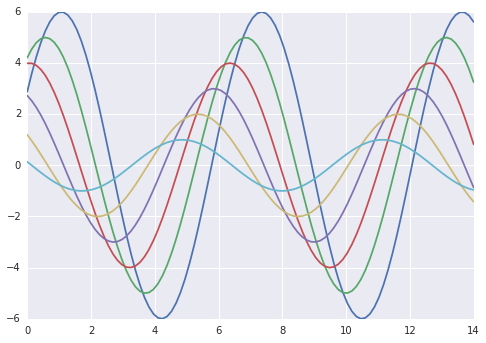

In [46]:
sinplot()